<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Открываем-файл-с-данными-и-изучаем-общую-информацию" data-toc-modified-id="Открываем-файл-с-данными-и-изучаем-общую-информацию-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открываем файл с данными и изучаем общую информацию</a></span></li><li><span><a href="#Очистка-и-лемматизирование-текстов" data-toc-modified-id="Очистка-и-лемматизирование-текстов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Очистка и лемматизирование текстов</a></span></li><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li><li><span><a href="#Разделим-выборку-на-3-части" data-toc-modified-id="Разделим-выборку-на-3-части-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Разделим выборку на 3 части</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Открываем файл с данными и изучаем общую информацию

In [1]:
# Импорт библиотек
import numpy as np
import os
import pandas as pd
import re 

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords as nltk_stopwords

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# чтение файлов с данными
pth1 = 'toxic_comments.csv'
pth1_local = 'D:/DS/datasets' + pth1
    
if os.path.exists(pth1):
    data = pd.read_csv(pth1) 
    
elif os.path.exists(pth1_local):
    data = pd.read_csv(pth1_local)

else:
    print('Файлы не найдены')

In [3]:
#Выводим первые 5 строчек датафрейма на экран.
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
data.info() #Выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [5]:
data = data.sample(50000).reset_index(drop=True) # мой компьютер не может обработать 159292. Выделила из датасета 50000 строк.

In [6]:
data.info() #Выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   toxic   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [7]:
# Посчитаем количество полных дубликатов.
data.duplicated().sum()

0

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
text,0.000000
toxic,0.000000


**Вывод:**

 В выборке 159292 строк и 2 столбца. Текст на английском языке. Полных дубликатов и пропусков нет.

### Очистка и лемматизирование текстов

In [9]:
# инициализируем Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [10]:
# напишем функцию для pos-тегов - маркировки частей речи
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [11]:
# напишем функцию для очистки и лемматизации текста с маркированными частями речи
def clear_lemmatize(text):
    text = text.lower() # переведем в нижний регистр
    text = re.sub(r'[^a-zA-Z]', ' ', text) # оставим только буквы
    clear = text.split() 
    lemm = []
    # в цикле лемматизируем очищенный текст
    for i in range(len(clear)):
        lemm.append(lemmatizer.lemmatize(clear[i], get_wordnet_pos(clear[i])))
    return " ".join(lemm)

In [12]:
data['prepared_text'] = data['text'].apply(clear_lemmatize)

In [13]:
#Выводим первые 5 строчек датафрейма на экран.
data.head()

,text,toxic,prepared_text
0,I could care less about American Hefeweizen. M...,0,i could care less about american hefeweizen ma...
1,"So, after you, if I got it right, NATO is vand...",0,so after you if i get it right nato be vandali...
2,Given recent laws/cases in the US a Voter ID a...,0,give recent law case in the u a voter id artic...
3,Betty ok look your right but 10 year olds don'...,0,betty ok look your right but year old don t ne...
4,"""\n\nBoy was that difficult. ¦ """,0,boy be that difficult


**Вывод:**

Провели очистку и лемматизацию комментариев.

### Исследование баланса классов

0    0.89812
1    0.10188
Name: toxic, dtype: float64


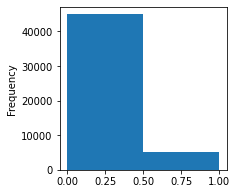

In [14]:
print(data['toxic'].value_counts(normalize=1))
data['toxic'].plot(kind ='hist', bins=2, figsize=(3,3));

**Вывод:**

Из полученных данных видно, что в целевом признаке наблюдается достаточно сильный дисбаланс классов.Только 10% отражают негативные комментарии. Разница почти в 9 раз.

### Разделим выборку на 3 части

In [15]:
# Зададим RandomState
RANDOM_STATE = 115247

# Разбиваем выборку в соотношении 60/20/20. 
train, valid, test = np.split(data.sample(frac=1, random_state=RANDOM_STATE), [int(.6*len(data)), int(.8*len(data))])

In [16]:
# Проверяем сколько строк и столбцов в полученных датасетах
print(train.shape)
print(valid.shape)
test.shape

(30000, 3)
(10000, 3)


(10000, 3)

Разделили датасет на 3 части в соотношении 60/20/20.

In [17]:
target_train = train['toxic']
features_train = train['prepared_text']

target_valid = valid['toxic']
features_valid = valid['prepared_text']

target_test = test['toxic']
features_test = test['prepared_text']

In [18]:
# найдём стоп-слова
stopwords = set(nltk_stopwords.words('english'))

# оздадим счётчик, указав в нём стоп-слова
count_tf_idf = TfidfVectorizer(stop_words=stopwords)

In [19]:
features_train = count_tf_idf.fit_transform(features_train)
features_valid = count_tf_idf.transform(features_valid)
features_test = count_tf_idf.transform(features_test)

## Обучение

Чтобы убрать дисбаланс классов, укажем гиперпараметр class_weight='balanced'

### Дерево решений

In [20]:
best_f1 = 0
best_depth = 0
best_model = None
for depth in range(2, 20, 2):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth,
                                  class_weight='balanced') 
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
    f1_tree = f1_score(target_valid, predictions_valid)
    
    if f1_tree > best_f1:
        best_model = model
        best_depth = depth
        best_f1 = f1_tree
        
print("Лучшая F1-мера:", best_f1, "Глубина дерева:", best_depth)

Лучшая F1-мера: 0.6101123595505618 Глубина дерева: 18


### Случайный лес

In [21]:
best_f1 = 0
best_est = 0
best_depth = 0
best_model = None
for est in range(20, 50):
    for depth in range(10, 25):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth = depth,
                                  class_weight='balanced') 
        model.fit(features_train, target_train) # обучите модель на тренировочной выборке
        predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
        f1_tree = f1_score(target_valid, predictions_valid)
    
        if f1_tree > best_f1:
            best_model = model
            best_est = est
            best_depth = depth
            best_f1 = f1_tree

print("Лучшая F1-мера", best_f1, "Количество деревьев:", best_est, "Глубина дерева:", best_depth)

Лучшая F1-мера 0.5028644175684278 Количество деревьев: 25 Глубина дерева: 21


### Логистическая регрессия

In [22]:
best_f1 = 0
best_max_iter = 0
best_c =0.1
for max_iter in range(900, 1000, 50):
    for c in range(2, 15):
        model = LogisticRegression(random_state=RANDOM_STATE, max_iter=max_iter,
                                  class_weight='balanced', C = c)  
        model.fit(features_train, target_train) # обучите модель на тренировочной выборке
        predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
        f1_tree = f1_score(target_valid, predictions_valid)
        print("F1-мера", f1_tree)
   
        if f1_tree > best_f1:
            best_max_iter = max_iter
            best_f1 = f1_tree
            best_c = c

print("Лучшая F1-мера", best_f1, "Глубина дерева:", best_max_iter, "C:", best_c)

F1-мера 0.757454383622608
F1-мера 0.7613483146067416
F1-мера 0.7643600180913613
F1-мера 0.7637687756030952
F1-мера 0.7626886145404663
F1-мера 0.7623853211009175
F1-мера 0.7611596870685687
F1-мера 0.7612009237875289
F1-мера 0.7583333333333334
F1-мера 0.7560296846011132
F1-мера 0.7575616565844578
F1-мера 0.7582673497904052
F1-мера 0.7598130841121495
F1-мера 0.757454383622608
F1-мера 0.7613483146067416
F1-мера 0.7643600180913613
F1-мера 0.7637687756030952
F1-мера 0.7626886145404663
F1-мера 0.7623853211009175
F1-мера 0.7611596870685687
F1-мера 0.7612009237875289
F1-мера 0.7583333333333334
F1-мера 0.7560296846011132
F1-мера 0.7575616565844578
F1-мера 0.7582673497904052
F1-мера 0.7598130841121495
Лучшая F1-мера 0.7643600180913613 Глубина дерева: 900 intercept_scaling: 4


**Вывод:**

Наилучший результат получили для ***Логистической регрессии***. 


| 	|Дерево решений   	|Случайный лес   	|   Логистическая регрессия  	|   
|:---	|:---:	|:---:	|:---:	|
|F1-мера    	|0.6101123595505618   	|0.5028644175684278 	| 0.7643600180913613	| 

## Тестирование модели

In [24]:
model = LogisticRegression(random_state=RANDOM_STATE, max_iter=900,
                                  class_weight='balanced', C = 4)    
model.fit(features_train, target_train) # обучите модель на тренировочной выборке
predictions_test = model.predict(features_test) # предсказания модели на валидационной выборке
      
f1_tree = f1_score(target_test, predictions_test)

print("F1-мера для тестовой выборки", f1_tree, "C:", 4)

F1-мера для тестовой выборки 0.7445323406235459 C: 4


**Вывод:**

F1-мера при тестировании показала результат, похожий для обучающей выборки.


## Выводы

Датасет состоит из 159292 строк. В нем нет полных дубликатов и пропущенных значений.

Для обработки компьютером данных, выбрано 50000 строк, на которых строим модели.

Комментарии были очищены от лемматизированы.

Был выявлен дисбаланс классов (почти в 9 раз). Поэтому в модели добавлена строка class_weight='balanced'. Для взвешивания классов.

Обучены 3 модели:

1. Дерево решений
2. Случайный лес
3. Логистическая регрессия

Наилучший результат показала модель ***Логистическая регрессия***. F1-мера = 0.7643600180913613.

На тестовой выборке эта модель показала качество немного хуже. F1-мера = 0.7445323406235459